# Gene coexpression analysis


### 1-Import the coexpression data from the three files. 
Rows are genes. Columns are individual samples.

In [1]:
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file1 = "gene-coexpression-dataset1.txt"
file2 = "gene-coexpression-dataset2.txt"
file3 = "gene-coexpression-dataset3.txt"

#expression matrices
data1 = pd.read_csv(file1, sep="\t")
data2 = pd.read_csv(file2, sep="\t")
data3 = pd.read_csv(file3, sep="\t")

#remove genes names --- 
data1 = data1[data1["Unnamed: 1"]!="---"]
data2 = data2[data2["Unnamed: 1"]!="---"]
data3 = data3[data3["Unnamed: 1"]!="---"]

In [3]:
corr_mat1 = data1.drop("Unnamed: 0", axis=1).drop("Unnamed: 1", axis=1).T.corr().to_numpy()
corr_mat2 = data2.drop("Unnamed: 0", axis=1).drop("Unnamed: 1", axis=1).T.corr().to_numpy()
corr_mat3 = data3.drop("Unnamed: 0", axis=1).drop("Unnamed: 1", axis=1).T.corr().to_numpy()



In [4]:
print(corr_mat1)
print(corr_mat2)
print(corr_mat3)

[[ 1.         -0.2063625   0.12580566 ...  0.12407133  0.2221844
   0.04074802]
 [-0.2063625   1.          0.1266834  ... -0.00686727  0.14921697
   0.08513493]
 [ 0.12580566  0.1266834   1.         ...  0.63931203  0.44312779
  -0.04419817]
 ...
 [ 0.12407133 -0.00686727  0.63931203 ...  1.          0.33881716
   0.00949369]
 [ 0.2221844   0.14921697  0.44312779 ...  0.33881716  1.
   0.17334292]
 [ 0.04074802  0.08513493 -0.04419817 ...  0.00949369  0.17334292
   1.        ]]
[[ 1.         -0.1320496   0.26722259 ...  0.25530466  0.36644441
   0.09102871]
 [-0.1320496   1.          0.09368996 ...  0.04704939 -0.11087734
  -0.30946545]
 [ 0.26722259  0.09368996  1.         ...  0.54250965  0.21112594
  -0.08499723]
 ...
 [ 0.25530466  0.04704939  0.54250965 ...  1.          0.20193058
   0.06535897]
 [ 0.36644441 -0.11087734  0.21112594 ...  0.20193058  1.
   0.2185884 ]
 [ 0.09102871 -0.30946545 -0.08499723 ...  0.06535897  0.2185884
   1.        ]]
[[ 1.          0.11746436  0.31563

### 3-Visualize correlations
I will plot the heatmaps and histograms

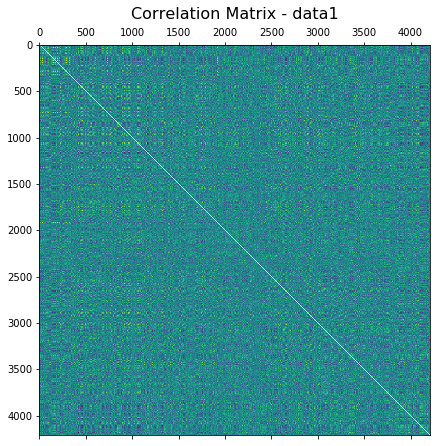

In [5]:
f = plt.figure(figsize=(10, 7))
plt.matshow(corr_mat1, fignum=f.number)
plt.title('Correlation Matrix - data1', fontsize=16);

[Text(0, 0.5, 'number of gene pairs'), Text(0.5, 0, 'correlation coefficient')]

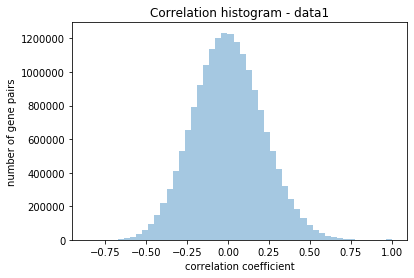

In [6]:

ax = sns.distplot(corr_mat1.flatten(),kde=False,norm_hist=False)
ax.set_title("Correlation histogram - data1")
ax.set(ylabel='number of gene pairs', xlabel='correlation coefficient')

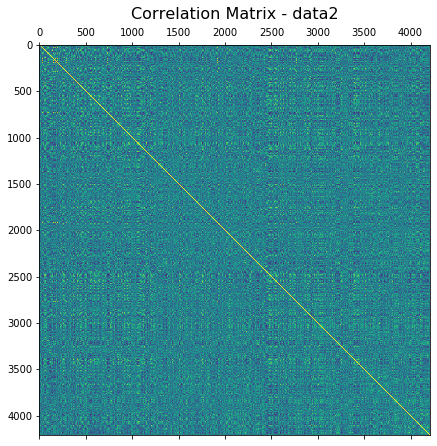

In [7]:
f = plt.figure(figsize=(10, 7))
plt.matshow(corr_mat2, fignum=f.number)
plt.title('Correlation Matrix - data2', fontsize=16);

[Text(0, 0.5, 'number of gene pairs'), Text(0.5, 0, 'correlation coefficient')]

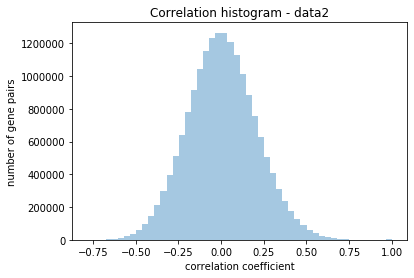

In [8]:
ax = sns.distplot(corr_mat2.flatten(),kde=False,norm_hist=False)
ax.set_title("Correlation histogram - data2")
ax.set(ylabel='number of gene pairs', xlabel='correlation coefficient')

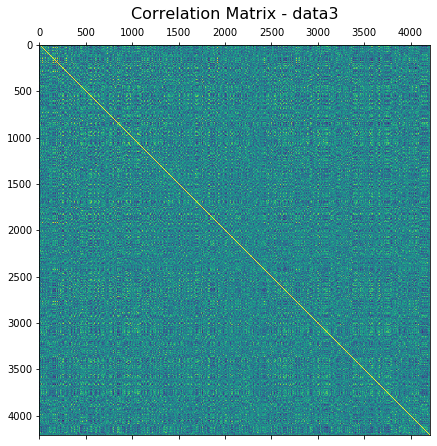

In [9]:
f = plt.figure(figsize=(10, 7))
plt.matshow(corr_mat3, fignum=f.number)
plt.title('Correlation Matrix - data3', fontsize=16);

[Text(0, 0.5, 'number of gene pairs'), Text(0.5, 0, 'correlation coefficient')]

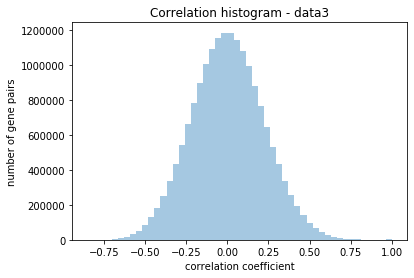

In [10]:
ax = sns.distplot(corr_mat3.flatten(),kde=False,norm_hist=False)
ax.set_title("Correlation histogram - data3")
ax.set(ylabel='number of gene pairs', xlabel='correlation coefficient')

### 4 - Calculate and visualize weighted average correlation

In [11]:
num_samples1 = len(data1.drop("Unnamed: 0", axis=1).drop("Unnamed: 1", axis=1).columns)
print(num_samples1)
num_samples2 = len(data2.drop("Unnamed: 0", axis=1).drop("Unnamed: 1", axis=1).columns)
print(num_samples2)
num_samples3 = len(data3.drop("Unnamed: 0", axis=1).drop("Unnamed: 1", axis=1).columns)
print(num_samples3)

wa_corr = (num_samples1*corr_mat1+num_samples2*corr_mat2+num_samples3*corr_mat3)/(num_samples1+num_samples2+num_samples3)

print(wa_corr)

87
148
60
[[ 1.         -0.10321701  0.23536255 ...  0.21477495  0.27031376
   0.06812757]
 [-0.10321701  1.          0.1338934  ...  0.00522099 -0.02779468
  -0.21999655]
 [ 0.23536255  0.1338934   1.         ...  0.54677815  0.29694737
  -0.04855065]
 ...
 [ 0.21477495  0.00522099  0.54677815 ...  1.          0.24303836
   0.04033345]
 [ 0.27031376 -0.02779468  0.29694737 ...  0.24303836  1.
   0.20964125]
 [ 0.06812757 -0.21999655 -0.04855065 ...  0.04033345  0.20964125
   1.        ]]


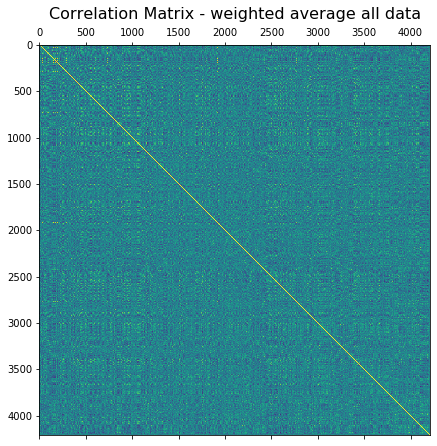

In [12]:
f = plt.figure(figsize=(10, 7))
plt.matshow(wa_corr, fignum=f.number)
plt.title('Correlation Matrix - weighted average all data', fontsize=16);

[Text(0, 0.5, 'number of gene pairs'), Text(0.5, 0, 'correlation coefficient')]

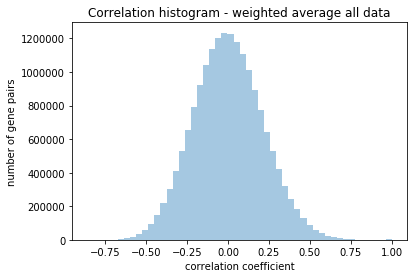

In [13]:
ax = sns.distplot(corr_mat1.flatten(),kde=False,norm_hist=False)
ax.set_title("Correlation histogram - weighted average all data")
ax.set(ylabel='number of gene pairs', xlabel='correlation coefficient')

In [14]:
#get the absolute values of correlation
wa_corr = np.abs(wa_corr)
#remove elements from the diagonal - remove self loops
np.fill_diagonal(wa_corr, 0)

### 5 - Construct unweighted coexpression networks with different thresholds and analyse them

In [15]:
thresholds = [0.5, 0.6, 0.7, 0.8, 0.9]
genes = data1["Unnamed: 1"].to_numpy()
print(genes)
print(len(genes))


summary ={"Threshold - c": [], "average node degree": [], "clustering coefficient": [], "network density": [], "network diameter": [], "characteristic path length": [], "highest degree gene(s)": []}
for c in thresholds:
    #get the indexes where correlation is greater than c - add those edges
    indexes = np.argwhere(wa_corr>c)
    edges = genes[indexes]
    #create a graph - nodes are all ganas
    G = nx.Graph()
    G.add_nodes_from(genes)
    G.add_edges_from(edges)
    summary["Threshold - c"].append(c)
    #1 - get average node degree
    avdeg =  sum([t[1] for t in G.degree])/len(G.degree)
    summary["average node degree"].append(avdeg)
    #2 - get clustering coefficient
    cc = nx.average_clustering(G)
    summary["clustering coefficient"].append(cc)
    #3 - get network density
    dens = nx.density(G)
    summary["network density"].append(dens)
    #4 - get network diameter - of largest connected component
    ccomponent = max(nx.connected_component_subgraphs(G), key=len)
    diam = nx.diameter(ccomponent)
    summary["network diameter"].append(diam)
    print(diam)
    #5 - get characteristic path length
    char = nx.average_shortest_path_length(ccomponent)
    summary["characteristic path length"].append(char)
    print(char)
    #6 - get gene(s) with highest degree (including the degree)
    deg_all = sorted(G.degree, key=lambda x: x[1], reverse=True)
    top_degrees=[]
    top_d = deg_all[0][1]
    i = 0
    while(deg_all[i][1]==top_d):
        top_degrees.append(deg_all[i])
        i+=1
    summary["highest degree gene(s)"].append(top_degrees)
    print(top_degrees)
    #7 - put results into a table




['DDR1' 'RFC2' 'PAX8' ... 'ZNF335' 'CENTA1' 'LRCH4']
4211
11
3.554551625920581
[('MRPS12', 187)]
15
4.973589535232112
[('RPS19', 91)]
21
7.391904047976012
[('RPLP1', 69), ('RPS19', 69)]
5
1.7874265038444144
[('RPL7', 50)]
4
1.7282608695652173
[('RPS18', 19)]


In [16]:
pd.DataFrame.from_dict(summary).head()

,Threshold - c,average node degree,clustering coefficient,network density,network diameter,characteristic path length,highest degree gene(s)
0,0.5,18.952887,0.275685,0.004580,11,3.554552,"[(MRPS12, 187)]"
1,0.6,3.952646,0.130304,0.000955,15,4.973590,"[(RPS19, 91)]"
2,0.7,1.120077,0.034091,0.000271,21,7.391904,"[(RPLP1, 69), (RPS19, 69)]"
3,0.8,0.431505,0.013293,0.000104,5,1.787427,"[(RPL7, 50)]"
4,0.9,0.050254,0.004197,0.000012,4,1.728261,"[(RPS18, 19)]"


### 6 - Take unweighted graph for c = 0.7 and weight the edges. Cluster this graph using hiearchical clustering (average linkage) and plot the clustered heatmap

In [17]:
filtered = np.where(wa_corr>0.7, wa_corr, 0)
#remove rows/columns not connected to anything
print(np.all(filtered == 0, axis=0))
print(np.all(filtered == 0, axis=1))
non_corr = np.where(np.all(filtered == 0, axis=0))
filtered=np.delete(filtered, non_corr, 0)
filtered=np.delete(filtered, non_corr, 1)
print(filtered.shape)

[ True  True False ...  True  True  True]
[ True  True False ...  True  True  True]
(460, 460)


(459, 4)
[1 2 2 1 2 2 2 2 2 1 1 1 1 2 2 2 2 2 2 1 2 1 1 1 1 2 2 2 1 1 1 1 1 1 2 2 2
 1 2 2 1 2 1 1 1 1 1 1 2 2 1 1 1 2 1 1 1 1 2 2 1 2 1 1 2 1 2 2 1 2 2 1 1 1
 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1
 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1
 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 2 2 1 1 1 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1
 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


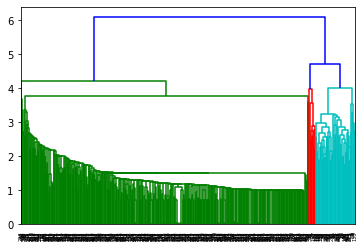

In [18]:
from scipy.cluster import hierarchy

Z = hierarchy.linkage(1-filtered, 'average')
plt.figure()
dn = hierarchy.dendrogram(Z)
print(Z.shape)
clusters = hierarchy.fcluster(Z,t=2, criterion='maxclust')
print(clusters)
plt.show()

/home/anja/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


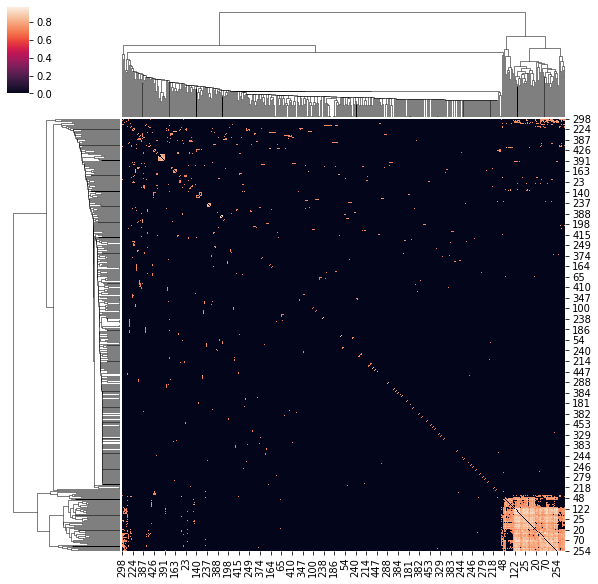

In [19]:
sns.clustermap(filtered)

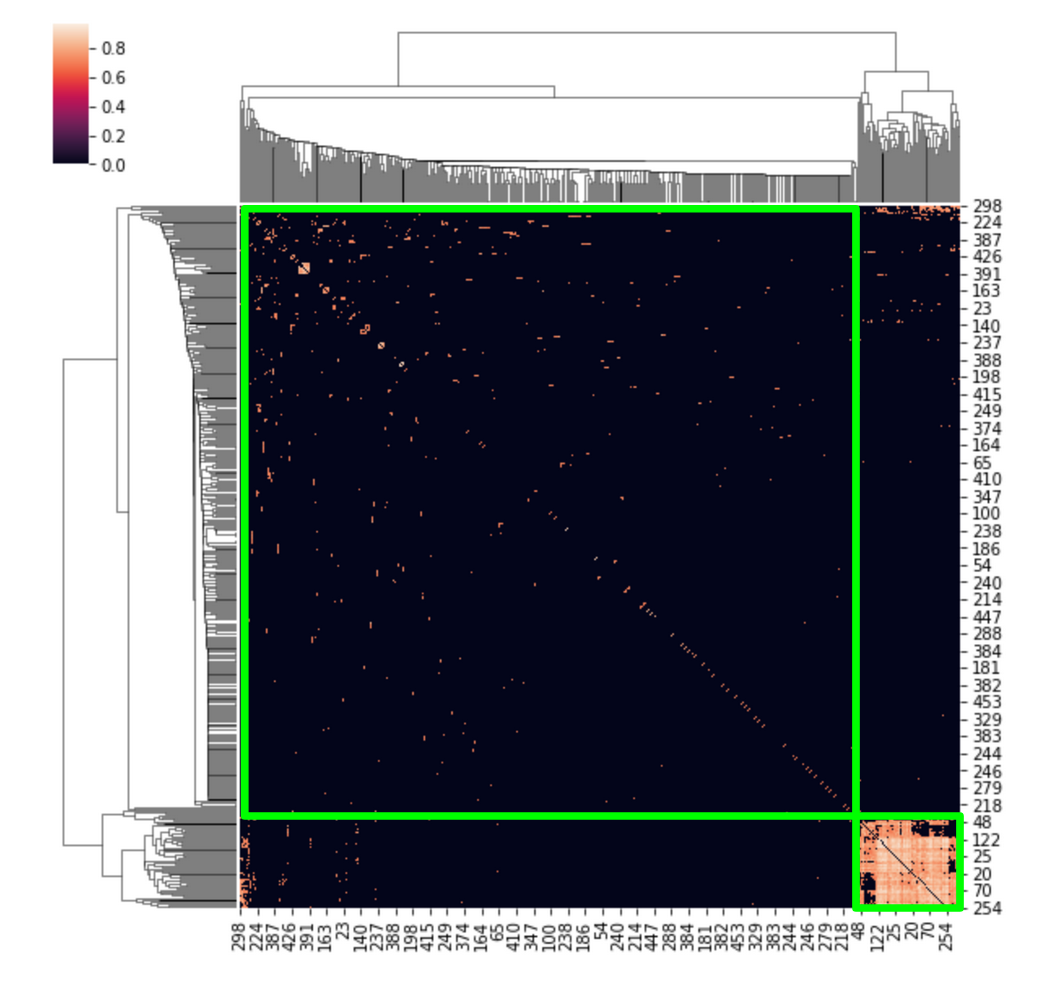

In [20]:
from IPython.display import Image
from IPython.core.display import HTML 
Image("img/modules.png")

In [21]:
print(len(clusters))
c1= np.argwhere(clusters==1).flatten()
c2= np.argwhere(clusters==2).flatten()
#c3= np.argwhere(cluster.labels_==2).flatten()
#c4= np.argwhere(cluster.labels_==3).flatten()
#c5=np.argwhere(cluster.labels_==4).flatten()
print(len(c1))
print(len(c2))
#print(len(c3))
#print(len(c4))
#print(len(c5))
g1=genes[c1]
g2=genes[c2]
#g3=genes[c3]
#g4=genes[c4]
#g5=genes[c5]

460
396
64


### 7 - Examine OMIM disease gene enrichment by the genes in detected modules and report p-values

In [22]:
from scipy.stats import hypergeom

#import disease gene data
all_omim_data = pd.read_csv('omim.disease_genes.01-26-2020.prop.txt', sep='\t')
all_dis_genes = all_omim_data["symbol"].unique()
print(all_dis_genes)
def num_overlaps(graph_genes, gene_list):
    intersection = graph_genes[np.in1d(graph_genes, gene_list)]
    return len(intersection)

def calculate_p_of_overlap(pool, interesting_genes, drawn):
    pool_size = len(pool)
    num_drawn_interesting = num_overlaps(drawn, interesting_genes)
    num_drawn = len(drawn)
    num_interesting_in_pool = num_overlaps(pool, interesting_genes)
    #print({"pool size":pool_size, "num_interesting_in_pool": num_interesting_in_pool,"num_drawn": num_drawn,"num_drawn_interesting":num_drawn_interesting, })
    p = hypergeom.sf(num_drawn_interesting-1, pool_size, num_interesting_in_pool, num_drawn)
    return p

p1 = calculate_p_of_overlap(genes, all_dis_genes, g1)
p2 = calculate_p_of_overlap(genes, all_dis_genes, g2)
#p3 = calculate_p_of_overlap(genes, all_dis_genes, g3)
#p4 = calculate_p_of_overlap(genes, all_dis_genes, g4)
#p5 = calculate_p_of_overlap(genes, all_dis_genes, g5)
print([p1,p2])

['AGL' 'AGK' 'PRKAG2' ... 'C1GALT1C1' 'CD55' 'NFIA']
[0.7189546895686558, 0.936860662207135]
